In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib. pyplot as plt
import random as rnd
import numpy as np
from keras.layers import Conv2D, Dense, MaxPooling2D, UpSampling2D, Input
import pandas as pd
from sewar.full_ref import uqi
from keras.models import load_model

In [2]:
(X_train, _), (X_test, _) = keras.datasets.mnist.load_data()

In [3]:
X_train = X_train/255
X_test = X_test/255

In [4]:
print("train : "+str(X_train.shape))
print("test : "+str(X_test.shape))

train : (60000, 28, 28)
test : (10000, 28, 28)


In [5]:
X_train = X_train.reshape(len(X_train), 28, 28, 1)
X_test = X_test.reshape(len(X_test), 28, 28, 1)

In [6]:
print("train : "+str(X_train.shape))
print("test : "+str(X_test.shape))

train : (60000, 28, 28, 1)
test : (10000, 28, 28, 1)


In [7]:
model = keras.Sequential([
    # encoder
    Conv2D(64, (3, 3), activation='relu',padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(28, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),

    # encode output
    Conv2D(1, (3, 3), activation='sigmoid', padding='same', name="CODE"),

    # decoder
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(28, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    UpSampling2D((2, 2)),

    # decode output
    Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 28)        16156     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 28)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          4048      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 16)         0

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=["accuracy"])

In [10]:
model.fit(X_train, X_train, epochs=20, validation_data=(X_test, X_test))

Epoch 1/20
1875/1875 [==============================] - 120s 63ms/step - loss: 0.1606 - val_loss: 0.1299
Epoch 2/20
1875/1875 [==============================] - 118s 63ms/step - loss: 0.1222 - val_loss: 0.1185
Epoch 3/20
1875/1875 [==============================] - 118s 63ms/step - loss: 0.1144 - val_loss: 0.1125
Epoch 4/20
1875/1875 [==============================] - 118s 63ms/step - loss: 0.1103 - val_loss: 0.1116
Epoch 5/20
1875/1875 [==============================] - 118s 63ms/step - loss: 0.1075 - val_loss: 0.1050
Epoch 6/20
1875/1875 [==============================] - 119s 63ms/step - loss: 0.1056 - val_loss: 0.1043
Epoch 7/20
1875/1875 [==============================] - 118s 63ms/step - loss: 0.1040 - val_loss: 0.1031
Epoch 8/20
1875/1875 [==============================] - 118s 63ms/step - loss: 0.1028 - val_loss: 0.1009
Epoch 9/20
1875/1875 [==============================] - 119s 64ms/step - loss: 0.1018 - val_loss: 0.0999
Epoch 10/20
1875/1875 [==============================] 

In [ ]:
model.save('auto_encoder.h5')

In [7]:
model = load_model('auto_encoder.h5')

In [8]:
encodeder = keras.Model(inputs=model.input, outputs=model.get_layer("CODE").output)
encoded_test_image = encodeder.predict(X_test)

313/313 [==============================] - 5s 14ms/step


In [9]:
print("encoded image shape: "+str(encoded_test_image.shape))

encoded image shape: (10000, 4, 4, 1)


In [10]:
decoded_test_image = model.predict(X_test)

313/313 [==============================] - 10s 33ms/step


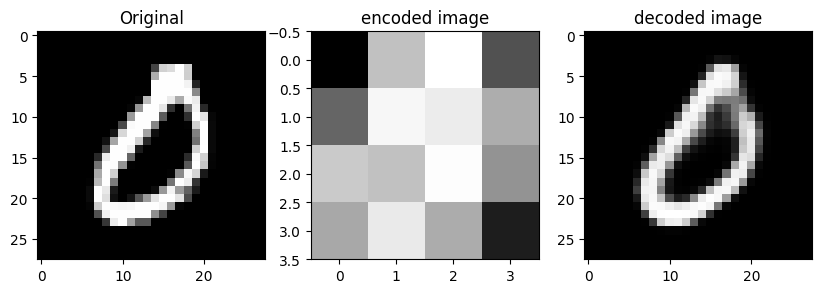

0.8783475743796497

In [16]:
index = rnd.randint(0, len(X_test))


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))

ax1.imshow(X_test[index],cmap='gray')
ax1.set_title('Original')

ax2.imshow(encoded_test_image[index],cmap='gray')
ax2.set_title('encoded image')

ax3.imshow(decoded_test_image[index],cmap='gray')
ax3.set_title('decoded image')

plt.show()
uqi(X_test[index], decoded_test_image[index])

In [13]:
print("Compression ratio: "+str(X_test.nbytes/encoded_test_image.nbytes))

Compression ratio: 98.0


In [14]:
different = 0
for i in range(len(X_test)):
    different = different + uqi(X_test[i], decoded_test_image[i])

score = different/len(X_test)

print("UQI image quality after decompression: "+str(score*100))

UQI image quality after decompression: 79.27741011434688
